# Installing dependecies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3) #when set to particular number, the calculation becomes same each time we run model
from tensorflow import keras
import os
import matplotlib.image as mpimg
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Loading datasets

Circle images:


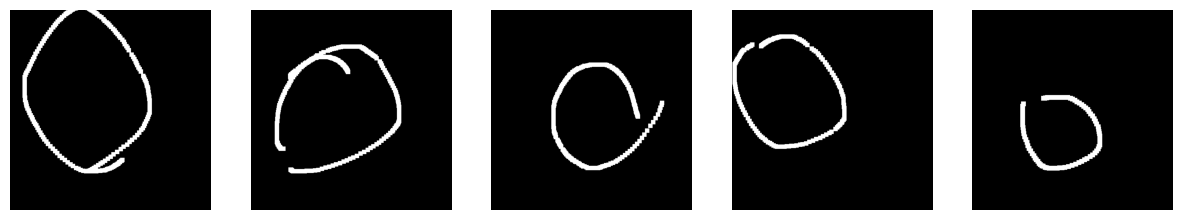


Square images:


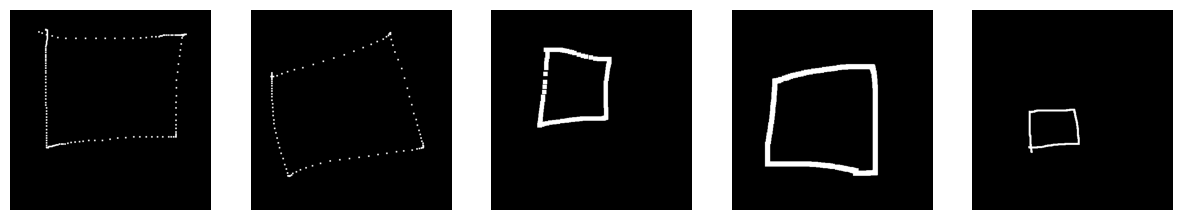


Triangle images:


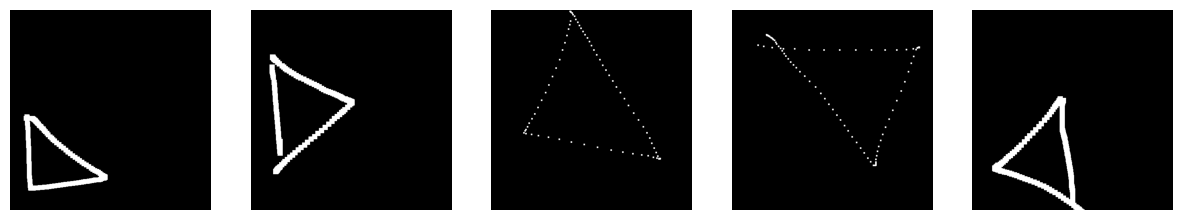

In [2]:
data_folder = 'train_data'
circle_folder = os.path.join(data_folder, 'circle')
square_folder = os.path.join(data_folder, 'square')
triangle_folder = os.path.join(data_folder, 'triangle')
line_folder = os.path.join(data_folder, 'line')

circle_files = os.listdir(circle_folder)
square_files = os.listdir(square_folder)
triangle_files = os.listdir(triangle_folder)
line_files = os.listdir(triangle_folder)

# Select random 5 circle images
circle_random_files = random.sample(circle_files, 5)
print("Circle images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(circle_random_files):
    file_path = os.path.join(circle_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 square images
square_random_files = random.sample(square_files, 5)
print("\nSquare images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(square_random_files):
    file_path = os.path.join(square_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 triangle images
triangle_random_files = random.sample(triangle_files, 5)
print("\nTriangle images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(triangle_random_files):
    file_path = os.path.join(triangle_folder, file)
    img = mpimg.imread(file_path)
    axs[i].imshow(img)
    axs[i].axis('off')
plt.show()

# Select random 5 line images
# line_random_files = random.sample(line_files, 5)
# print("\nCircle images:")
# fig, axs = plt.subplots(1, 5, figsize=(15, 3))
# for i, file in enumerate(line_random_files):
#     file_path = os.path.join(line_folder, file)
#     img = mpimg.imread(file_path)
#     axs[i].imshow(img)
#     axs[i].axis('off')
# plt.show()

Preprocessed Circle Images:


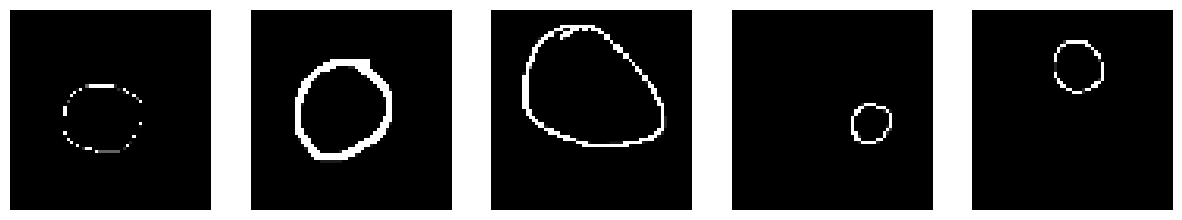


Augmented Images:


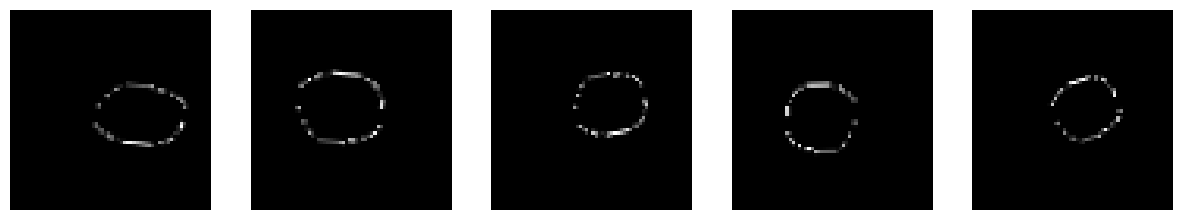

In [3]:
from skimage import exposure
# Function to preprocess images
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Resize the image to a fixed size
    img = cv2.resize(img, (64, 64))
    
    # Convert the image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Normalize pixel values to be between 0 and 1
    img = img / 255.0
    
    # Apply histogram equalization for contrast enhancement
    img = exposure.equalize_hist(img)
    
    return img

# Select random 5 images for display
circle_files = os.listdir(circle_folder)
circle_random_files = random.sample(circle_files, 5)

# Preprocess and display the images for circle category
print("Preprocessed Circle Images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, file in enumerate(circle_random_files):
    file_path = os.path.join(circle_folder, file)
    img = preprocess_image(file_path)
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
plt.show()

# Preprocess and perform data augmentation
# Define the augmentation parameters for the ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,              # Randomly rotate the images within the range of -20 to +20 degrees
    width_shift_range=0.1,          # Randomly shift the width of the images by a maximum of 0.1 times the total width
    height_shift_range=0.1,         # Randomly shift the height of the images by a maximum of 0.1 times the total height
    shear_range=0.2,                # Randomly shear the images within the range of -0.2 to +0.2 radians
    zoom_range=0.2,                 # Randomly zoom into the images by a factor of up to 0.2
    horizontal_flip=True,           # Randomly flip the images horizontally
    vertical_flip=True,             # Randomly flip the images vertically
    fill_mode='nearest'             # Fill any newly created pixels after rotation or shifting with the nearest pixel value
)

# Load an example image for preprocessing and data augmentation
example_image_path = os.path.join(circle_folder, circle_random_files[0])
example_image = preprocess_image(example_image_path)
example_image = np.expand_dims(example_image, axis=2)
example_image = np.expand_dims(example_image, axis=0)

# Generate augmented images
augmented_images = datagen.flow(example_image, batch_size=5)

# Display augmented images
print("\nAugmented Images:")
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    augmented_image = augmented_images.next()[0]
    axs[i].imshow(augmented_image[:, :, 0], cmap='gray')
    axs[i].axis('off')
plt.show()

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

data_folder = 'train_data'
categories = ['circle', 'square', 'triangle']
num_classes = len(categories)
input_shape = (64, 64, 1)  # As images are resized to 64x64 during preprocessing

# Load and preprocess images
images = []
labels = []

for category_id, category in enumerate(categories):
    folder_path = os.path.join(data_folder, category)
    files = os.listdir(folder_path)
    
    for file in files:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, input_shape[:2])
        img = img / 255.0
        images.append(img)
        labels.append(category_id)

# Convert data to NumPy arrays
images = np.array(images).reshape(-1, *input_shape)
labels = to_categorical(labels, num_classes)

# # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Create the CNN model
model1 = Sequential()
# Add the first convolutional layer
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Add the second convolutional layer
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output from convolutional layers
model1.add(Flatten())
# Add a fully connected layer
model1.add(Dense(128, activation='relu'))
# Add the output layer
model1.add(Dense(num_classes, activation='softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history1=model1.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/50
153/153 [==============================] - 17s 103ms/step - loss: 0.6795 - accuracy: 0.7211 - val_loss: 0.3962 - val_accuracy: 0.8652
Epoch 2/50
153/153 [==============================] - 16s 107ms/step - loss: 0.2533 - accuracy: 0.9161 - val_loss: 0.3006 - val_accuracy: 0.8956
Epoch 3/50
153/153 [==============================] - 17s 111ms/step - loss: 0.1095 - accuracy: 0.9663 - val_loss: 0.2620 - val_accuracy: 0.9113
Epoch 4/50
153/153 [==============================] - 17s 109ms/step - loss: 0.0418 - accuracy: 0.9903 - val_loss: 0.2573 - val_accuracy: 0.9187
Epoch 5/50
153/153 [==============================] - 16s 101ms/step - loss: 0.0165 - accuracy: 0.9977 - val_loss: 0.3142 - val_accuracy: 0.9285
Epoch 6/50
153/153 [==============================] - 17s 108ms/step - loss: 0.0171 - accuracy: 0.9967 - val_loss: 0.3012 - val_accuracy: 0.9203
Epoch 7/50
153/153 [==============================] - 16s 108ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 0.3396 - val_ac

39/39 [==============================] - 1s 20ms/step - loss: 0.3454 - accuracy: 0.9318
Test Loss: 0.3454
Test Accuracy: 0.9318


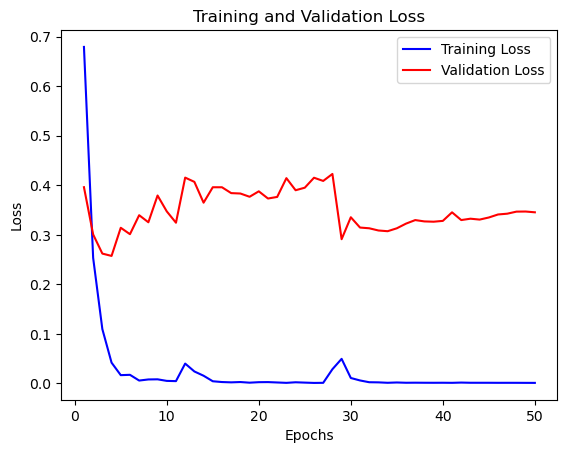

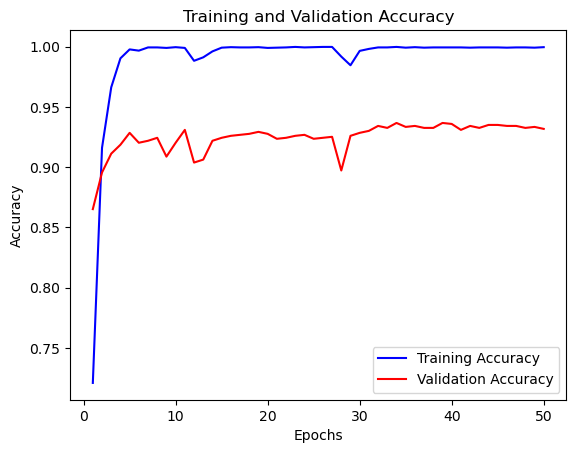

In [7]:
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
# Retrieve the loss values and accuracy values from the training history
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
train_accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']

# Plot the training and validation loss
epochs = range(1, len(train_loss1) + 1)
plt.plot(epochs, train_loss1, 'b', label='Training Loss')
plt.plot(epochs, val_loss1, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(epochs, train_accuracy1, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy1, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Print the values of training and validation loss and accuracy

print(f"Epoch {epoch + 1}:")
print(f"Training Loss: {train_loss1[epoch]:.4f}")
print(f"Validation Loss: {val_loss1[epoch]:.4f}")
print(f"Training Accuracy: {train_accuracy1[epoch]:.4f}")
print(f"Validation Accuracy: {val_accuracy1[epoch]:.4f}")
print()


39/39 [==============================] - 1s 16ms/step - loss: 0.3454 - accuracy: 0.9318
Test Loss: 0.3454
Test Accuracy: 0.9318
Epoch 50:
Training Loss: 0.0009
Validation Loss: 0.3454
Training Accuracy: 0.9996
Validation Accuracy: 0.9318



1/1 [==============================] - 0s 134ms/step


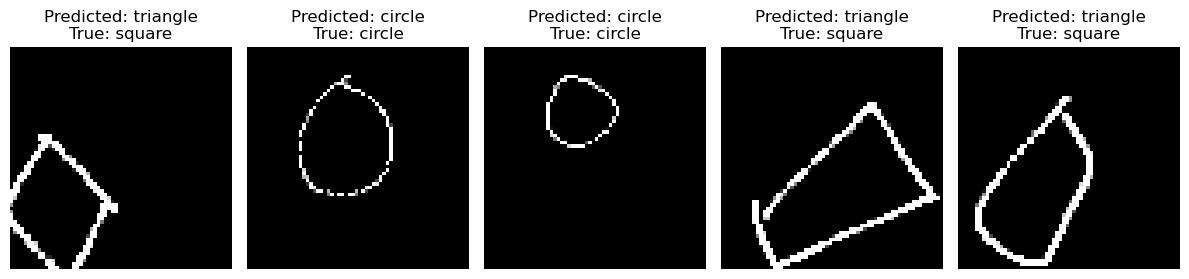

In [8]:
# Select some random test images
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)
test_images = X_test[random_indices]
test_labels = y_test[random_indices]

# Make predictions using the trained model
predictions = model1.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize the images and their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(12, 4))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i].squeeze(), cmap='gray')
    ax.set_title(f"Predicted: {categories[predicted_labels[i]]}\nTrue: {categories[np.argmax(test_labels[i])]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred1 = model1.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_labels1 = np.argmax(y_pred, axis=1)
# Convert true labels to categorical representation
y_test_labels1 = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test_labels1, y_pred_labels1)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create heatmap using seaborn
heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(categories, rotation=45, ha='right')
ax.yaxis.set_ticklabels(categories, rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

39/39 [==============================] - 2s 38ms/step


NameError: name 'y_pred' is not defined

In [10]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [ ]:
# model1.save("model1-shapeprediction.h5")


# model2

In [ ]:
# from tensorflow.keras.utils import to_categorical

# # Create another CNN model
# model = Sequential()
# # Add the first convolutional layer
# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # Add the second convolutional layer
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# # Flatten the output from convolutional layers
# model.add(Flatten())
# # Add a fully connected layer
# model.add(Dense(128, activation='relu'))
# # Add a fully connected layer
# model.add(Dense(256, activation='relu'))
# # Add a fully connected layer
# model.add(Dense(32, activation='relu'))
# # Add the output layer
# model.add(Dense(num_classes, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# history2 =model.fit(X_train, y_train, batch_size=512, epochs=10, validation_data=(X_test, y_test))

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Make predictions on the test set
# y_pred2 = model.predict(X_test)
# # Convert predicted probabilities to class labels
# y_pred_labels2 = np.argmax(y_pred, axis=1)
# # Convert true labels to categorical representation
# y_test_labels2 = np.argmax(y_test, axis=1)

# # Create confusion matrix
# cm = confusion_matrix(y_test_labels2, y_pred_labels2)

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 6))

# # Create heatmap using seaborn
# heatmap = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

# # Set labels, title, and ticks
# ax.set_xlabel('Predicted')
# ax.set_ylabel('True')
# ax.set_title('Confusion Matrix')
# ax.xaxis.set_ticklabels(categories, rotation=45, ha='right')
# ax.yaxis.set_ticklabels(categories, rotation=0)

# # Display the plot
# plt.tight_layout()
# plt.show()

In [ ]:
# # Retrieve the loss values and accuracy values from the training history
# train_loss2 = history2.history['loss']
# val_loss2 = history2.history['val_loss']
# train_accuracy2 = history2.history['accuracy']
# val_accuracy2 = history2.history['val_accuracy']

# # Plot the training and validation loss
# epochs = range(1, len(train_loss2) + 1)
# plt.plot(epochs, train_loss2, 'b', label='Training Loss')
# plt.plot(epochs, val_loss2, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Plot the training and validation accuracy
# plt.plot(epochs, train_accuracy2, 'b', label='Training Accuracy')
# plt.plot(epochs, val_accuracy2, 'r', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

In [ ]:
# model.summary()

In [ ]:
# model.save("name-model-shapedetection.h5")

In [ ]:
# model1.save("shapeprediction4.h5")

Test the model

In [ ]:
# model.predict(np.expand_dims(X_test[0],axis=0)).round(2)

In [ ]:
# np.argmax(model.predict(np.expand_dims(X_test[0],axis=0)).round(2))

In [ ]:
# y_test[0]

In [ ]:
# y_pred = model.predict(X_test).round(2)

In [ ]:
# y_pred

In [ ]:
# model.evaluate(X_test,y_test)

In [ ]:
# # Select some random test images
# num_samples = 5
# random_indices = np.random.choice(len(X_test), num_samples, replace=False)
# test_images = X_test[random_indices]
# test_labels = y_test[random_indices]

# # Make predictions using the trained model
# predictions = model.predict(test_images)
# predicted_labels = np.argmax(predictions, axis=1)

# # Visualize the images and their predicted labels
# fig, axes = plt.subplots(nrows=1, ncols=num_samples, figsize=(12, 4))

# for i, ax in enumerate(axes):
#     ax.imshow(test_images[i].squeeze(), cmap='gray')
#     ax.set_title(f"Predicted: {categories[predicted_labels[i]]}\n: {categories[np.argmax(test_labels[i])]}")
#     ax.axis('off')

# plt.tight_layout()
# plt.show()